In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import json

# Load data in

In [ ]:
with open('benchmark_results/benchmark_results_x3dh.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame and add milliseconds
df = pd.DataFrame(data)
times = df["times"][1:] / 1_000_000

df = pd.DataFrame(data)

# Step 2: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['times'].quantile(0.25)
Q3 = df['times'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the data
df_no_outliers = df[(df['times'] >= lower_bound) & (df['times'] <= upper_bound)]
times_no_outliers = df_no_outliers["times"][1:] / 1_000_000

# Box plot

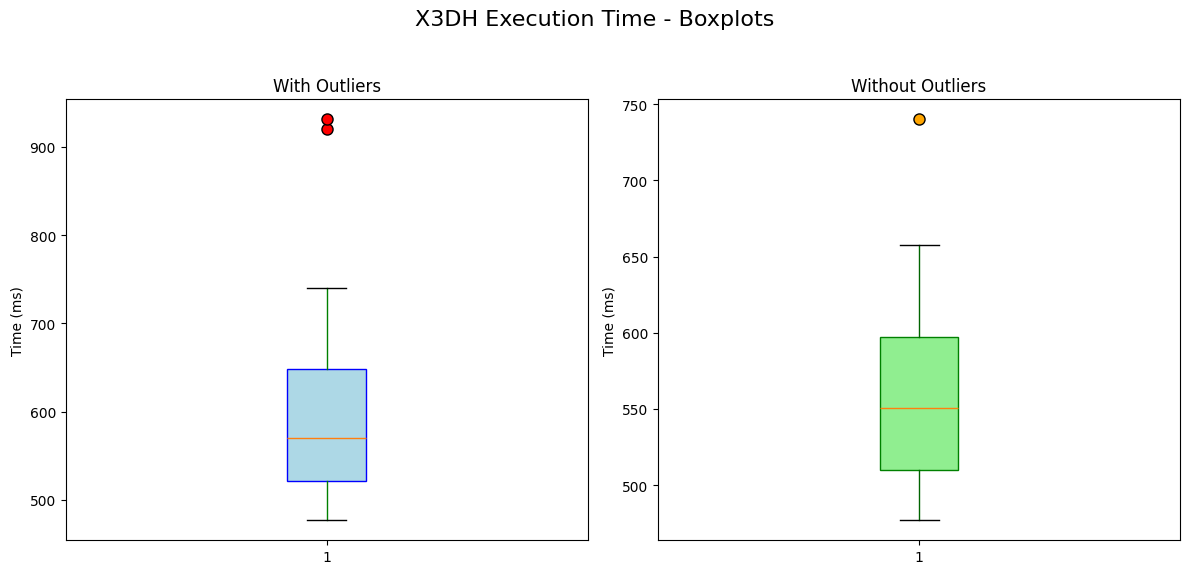

In [3]:
# Plotting
plt.figure(figsize=(12, 6))  # Bigger figure

# Subplot 1: With outliers
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.boxplot(times, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='green'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('With Outliers')
plt.ylabel('Time (ms)')

# Subplot 2: Without outliers
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.boxplot(times_no_outliers, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            whiskerprops=dict(color='darkgreen'),
            flierprops=dict(markerfacecolor='orange', marker='o', markersize=8))
plt.title('Without Outliers')
plt.ylabel('Time (ms)')

plt.suptitle('X3DH Execution Time - Boxplots', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("x3dh_dual.png")

plt.show()


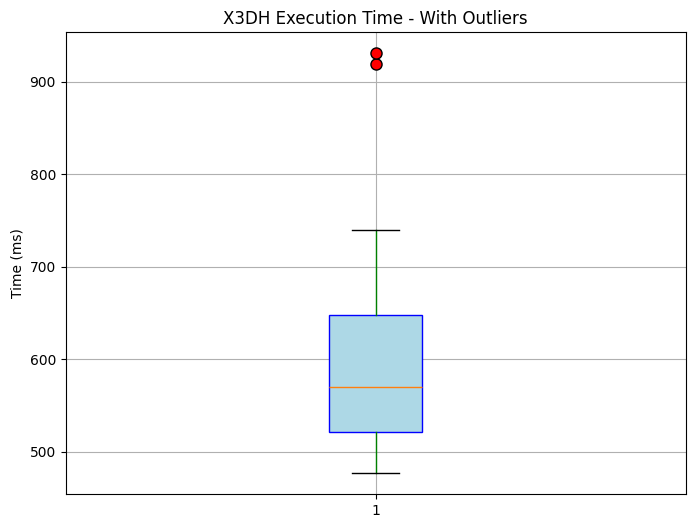

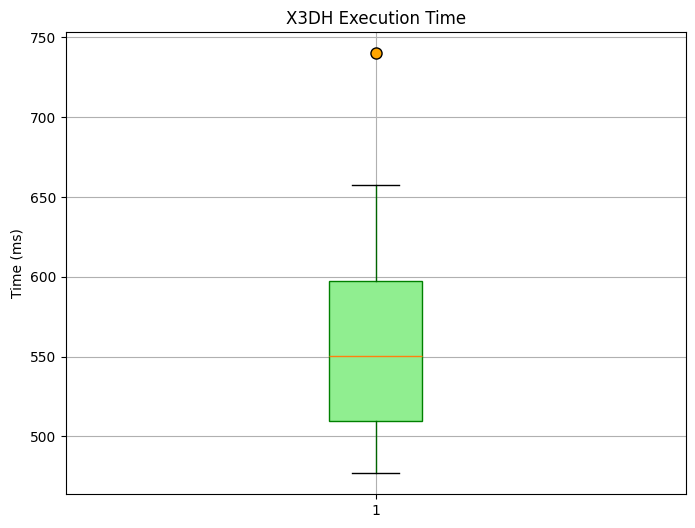

In [6]:
# --- Plot 1: With Outliers ---
plt.figure(figsize=(8, 6))
plt.boxplot(times, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='green'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('X3DH Execution Time - With Outliers')
plt.ylabel('Time (ms)')
plt.grid(True)
plt.savefig("x3dh_outliers.png")

plt.show()

# --- Plot 2: Without Outliers ---
plt.figure(figsize=(8, 6))
plt.boxplot(times_no_outliers, vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', color='green'),
            whiskerprops=dict(color='darkgreen'),
            flierprops=dict(markerfacecolor='orange', marker='o', markersize=8))
plt.title('X3DH Execution Time')
plt.ylabel('Time (ms)')
plt.grid(True)
plt.savefig("x3dh_no_outliers.png")

plt.show()